In [1]:
import pandas

data = pandas.read_csv('data/world-happiness-report-2017.csv')

input_data = data['Economy..GDP.per.Capita.']
output_data = data['Happiness.Score']

<Axes: >

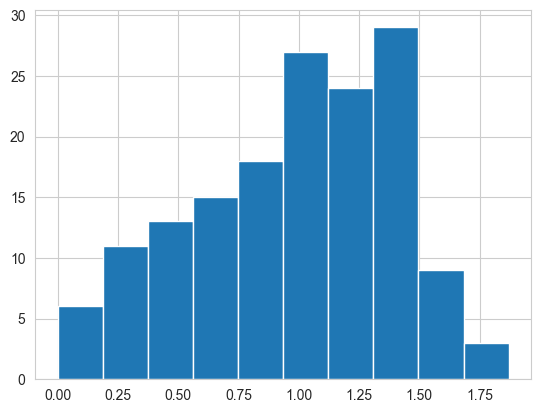

In [2]:
input_data.hist()

<Axes: >

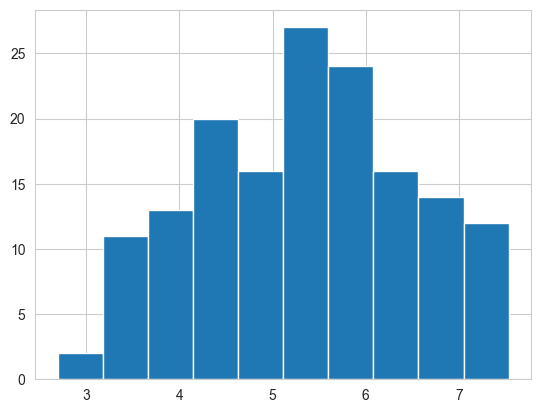

In [3]:
output_data.hist()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

batch_size = 32

model = SGDRegressor()

input_train, input_test, output_train, output_test = train_test_split(input_data.values.reshape(-1, 1), output_data,
                                                                      test_size=0.2, random_state=42)
for i in range(0, len(input_train), batch_size):
    model.partial_fit(input_train[i:i + batch_size], output_train[i:i + batch_size])

predicted = model.predict(input_test)

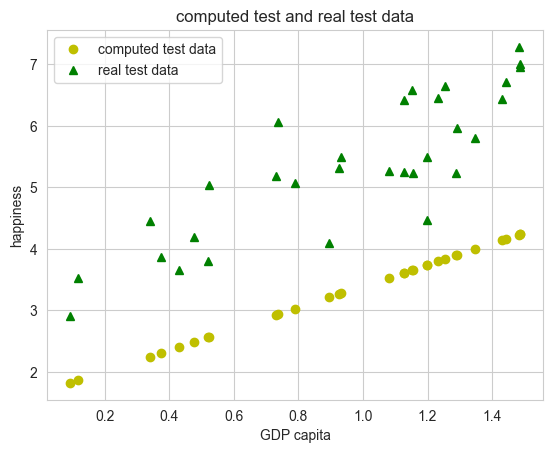

In [5]:
from matplotlib import pyplot as plt


def plot_test_data():
    plt.plot(input_test, predicted, 'yo', label='computed test data')
    plt.plot(input_test, output_test, 'g^', label='real test data')
    plt.title('computed test and real test data')
    plt.xlabel('GDP capita')
    plt.ylabel('happiness')
    plt.legend()
    plt.show()


plot_test_data()

In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(output_test, predicted)

print("Mean Squared Error:", mse)

Mean Squared Error: 4.5595896899349935
